In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

PARENT_PATH = Path().resolve().parent
DATASET_PATH = PARENT_PATH / 'dataset'

In [3]:
# Load datasets
customer_interactions_df = pd.read_csv(DATASET_PATH / 'customer_interactions.csv')
purchase_history_df = pd.read_csv(DATASET_PATH / 'purchase_history.csv')
product_details_df = pd.read_csv(DATASET_PATH / 'product_details.csv')

### Cutomer Interactions

In [4]:
print("Shape of customer_interactions_df:", customer_interactions_df.shape)
customer_interactions_df.head()

Shape of customer_interactions_df: (100, 3)


,Customer ID,Page views,Time spent on website
0,1,18,19
1,2,48,9
2,3,8,43
3,4,11,15
4,5,5,25


In [5]:
customer_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer ID            100 non-null    int64
 1   Page views             100 non-null    int64
 2   Time spent on website  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [6]:
customer_interactions_df.describe()

,Customer ID,Page views,Time spent on website
count,100.000000,100.000000,100.000000
mean,50.500000,24.510000,31.020000
std,29.011492,14.739143,16.873852
min,1.000000,1.000000,1.000000
25%,25.750000,11.000000,17.000000
50%,50.500000,23.000000,30.000000
75%,75.250000,39.000000,48.000000
max,100.000000,50.000000,60.000000


Based on the data above, we can observe that there are 100 customers. On average, each customer spends approximately 31 minutes on the website, while accessing around 24 pages. This indicates a moderate level of engagement, with customers spending a considerable amount of time browsing through various sections of the website. 

These metrics provide insights into customer behavior and interaction patterns, which can be valuable for analyzing user engagement and optimizing website content or design to enhance the overall user experience.

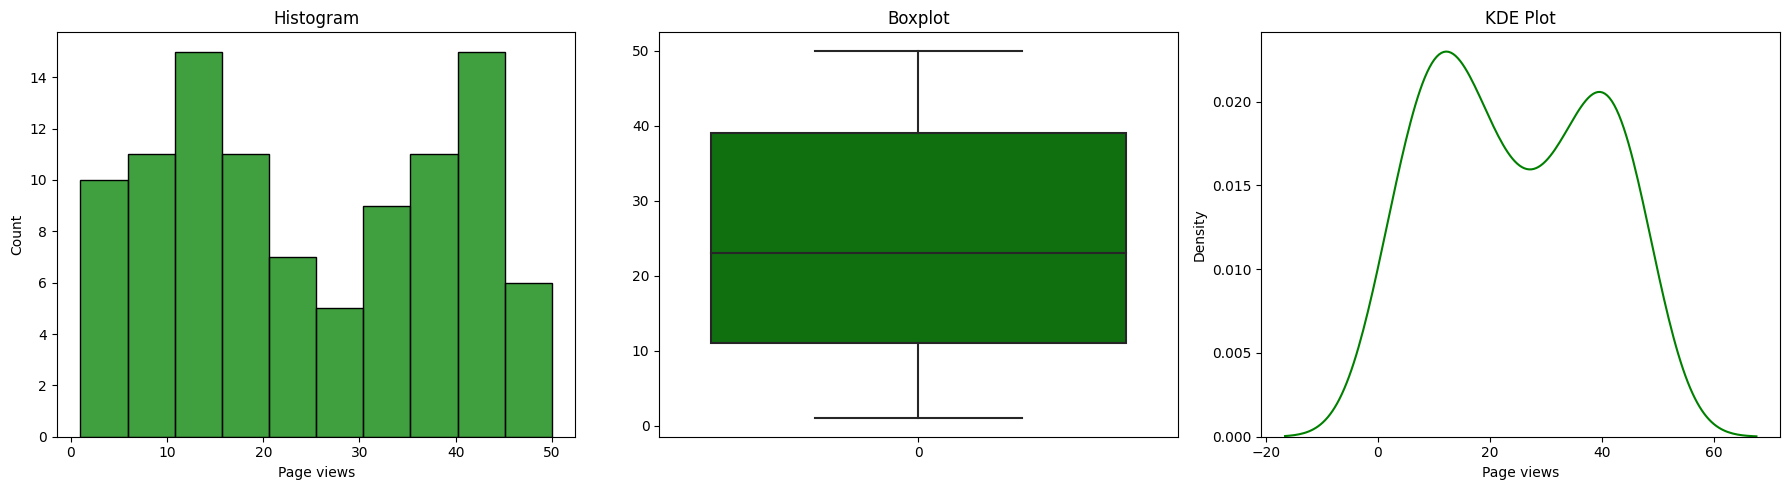

In [4]:
# Define a function to plot
def plot_eda(df, column):
    data = df[column]
    # Create a grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    # Histogram (1,1)
    sns.histplot(data, ax=axes[0], color='green', bins=10)
    axes[0].set_title('Histogram')
    # Boxplot (1,2)
    sns.boxplot(data, ax=axes[1], color='green')
    axes[1].set_title('Boxplot')
    # KDE plot (1,3)
    sns.kdeplot(data, ax=axes[2], color='green')
    axes[2].set_title('KDE Plot')
    # Adjust layout
    plt.tight_layout()
    # Show the plot
    plt.show()
    
plot_eda(customer_interactions_df, 'Page views')

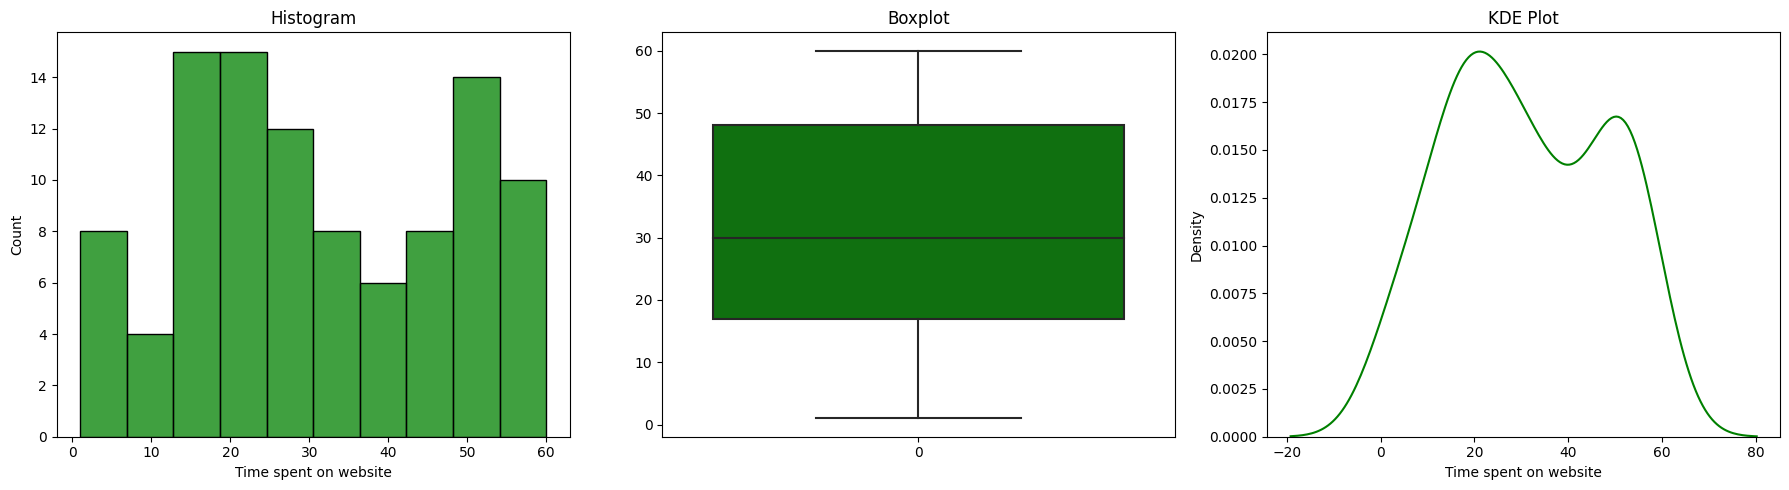

In [5]:
plot_eda(customer_interactions_df, 'Time spent on website')

The columns "page views" and "time spent on website" exhibit a bimodal distribution, characterized by having two distinct peaks. A bimodal distribution indicates the presence of two separate groups or subpopulations within the data, each with its own characteristic behavior or pattern. This phenomenon suggests that there are two distinct segments of customers or users with differing preferences, interests, or engagement levels.

In the context of website analytics, this bimodal distribution could imply the presence of two distinct user groups: one group that interacts more heavily with the website, resulting in higher page views and longer time spent, and another group that engages less frequently, leading to lower page views and shorter time spent. Understanding these distinct user segments can be valuable for tailoring marketing strategies, content offerings, or user experience enhancements to better cater to the needs and preferences of each group. Additionally, further analysis such as segmentation or clustering techniques could be employed to explore and characterize these user groups more comprehensively.

## Purchase History

In [6]:
print("Shape of purchase_history_df:", purchase_history_df.shape)
purchase_history_df.head()

Shape of purchase_history_df: (1000, 3)


,Customer ID,Product ID,Purchase date
0,7,6,2024-01-18
1,25,12,2024-02-10
2,89,14,2024-02-09
3,27,8,2024-01-22
4,5,18,2024-01-24


'Customer ID'

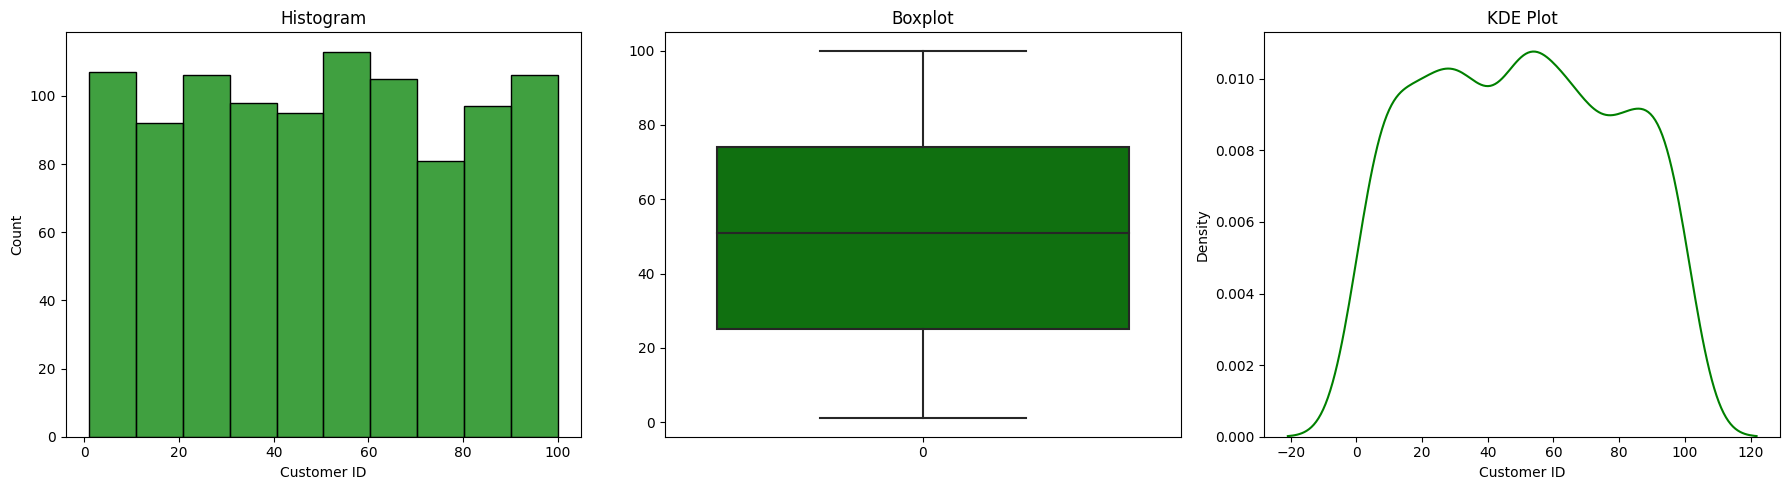

'Product ID'

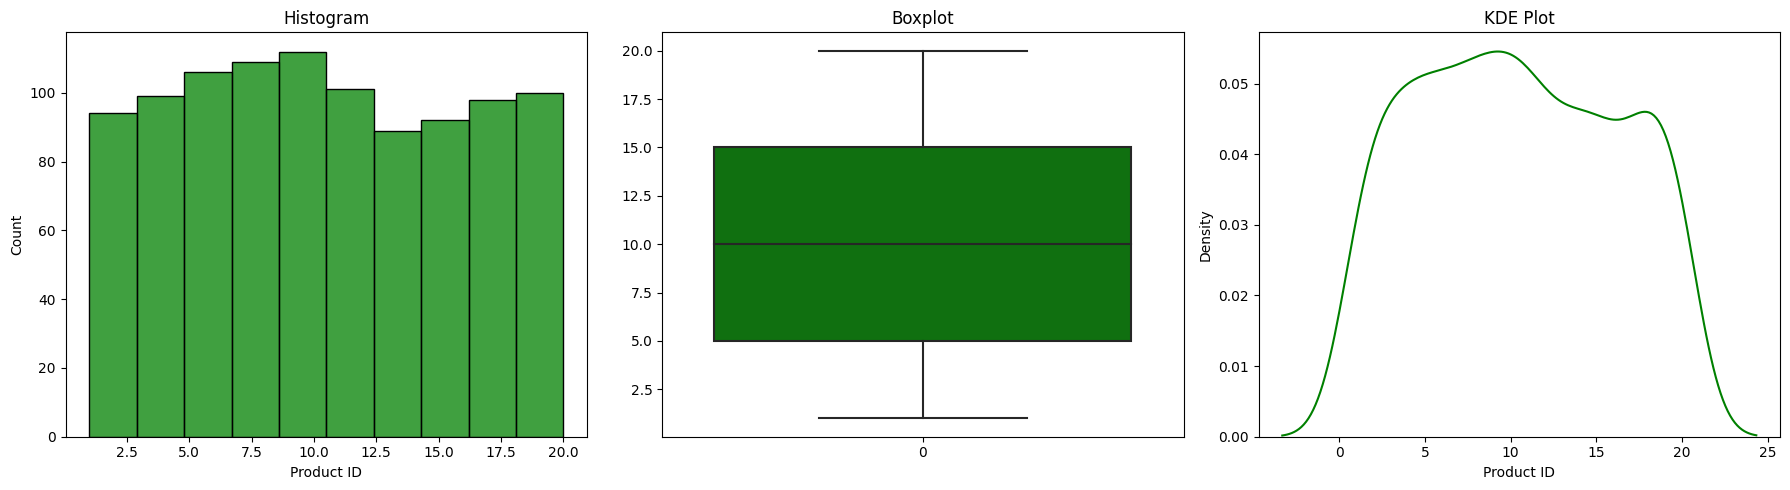

In [7]:
for col in purchase_history_df.columns[:-1]:
    display(col)
    plot_eda(purchase_history_df, col)

The data shows that both "customer ID" and "product ID" exhibit a uniform distribution. This indicates that each customer has nearly equal probability of making a purchase, and similarly, each product has nearly equal opportunity of being purchased.

In the context of customer behavior analysis, a uniform distribution for "customer ID" suggests that there is no significant variation in the purchasing behavior among customers. It implies that all customers are equally likely to make a purchase, without any particular customer group dominating the sales.

Similarly, a uniform distribution for "product ID" indicates that all products are equally likely to be purchased by customers. This suggests that there are no products that significantly outperform or underperform compared to others in terms of sales volume.

Understanding these uniform distributions can be valuable for inventory management, marketing strategies, and product development. It implies that resources can be allocated more evenly across customers and products, and efforts can be made to attract a broad customer base without focusing excessively on specific customer segments or products. Additionally, it may prompt further investigation into factors influencing purchasing decisions and potential strategies to diversify customer preferences and product offerings.

We can observe the relationship between Product ID and Customer ID using a scatterplot like the one below.

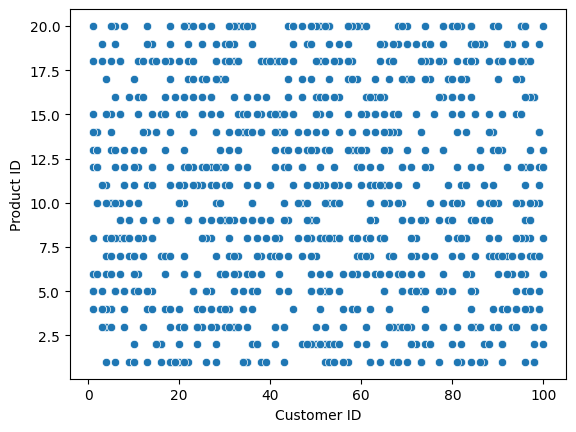

In [11]:
sns.scatterplot(data=purchase_history_df, x='Customer ID', y='Product ID');

From the visualization, we can see that there is no specific relationship between Customer ID and Product ID in the context of purchasing. This implies that anyone can purchase any product, regardless of their specific customer ID or the product's ID.

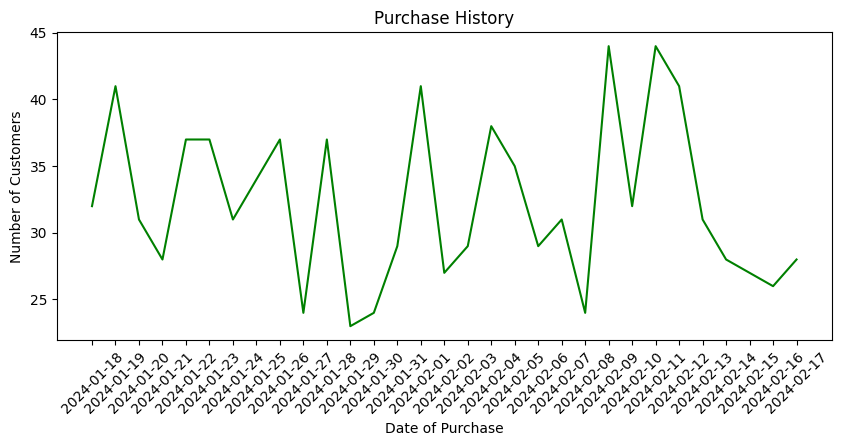

In [10]:
# Group by 'Purchase date' and count the number of 'Customer ID' for each date
purchase_counts = purchase_history_df.groupby('Purchase date')['Customer ID'].count().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=purchase_counts, x='Purchase date', y='Customer ID', color='g')
plt.title('Purchase History')
plt.xlabel('Date of Purchase')
plt.ylabel('Number of Customers')

plt.xticks(rotation=45)
plt.show()

## Product Details

In [11]:
print("Shape of product_details_df:", product_details_df.shape)
product_details_df.head()

Shape of product_details_df: (20, 4)


,Product ID,Category,Price,Ratings
0,1,Electronics,210.32,4.6
1,2,Clothing,228.36,4.7
2,3,Books,399.18,3.9
3,4,Books,237.73,1.1
4,5,Electronics,492.34,4.0


## Merge the Data

In [13]:
merged_df = pd.merge(purchase_history_df, product_details_df, on='Product ID', how='left')
merged_df

,Customer ID,Product ID,Purchase date,Category,Price,Ratings
0,7,6,2024-01-18,Books,370.96,4.5
1,25,12,2024-02-10,Books,437.51,3.2
2,89,14,2024-02-09,Electronics,388.34,2.5
3,27,8,2024-01-22,Books,346.56,4.4
4,5,18,2024-01-24,Home & Kitchen,65.83,2.9
...,...,...,...,...,...,...
995,51,5,2024-02-14,Electronics,492.34,4.0
996,45,20,2024-01-20,Books,317.61,2.9
997,94,8,2024-02-10,Books,346.56,4.4
998,28,14,2024-02-04,Electronics,388.34,2.5


Now we can observe the product categories that are most frequently purchased.

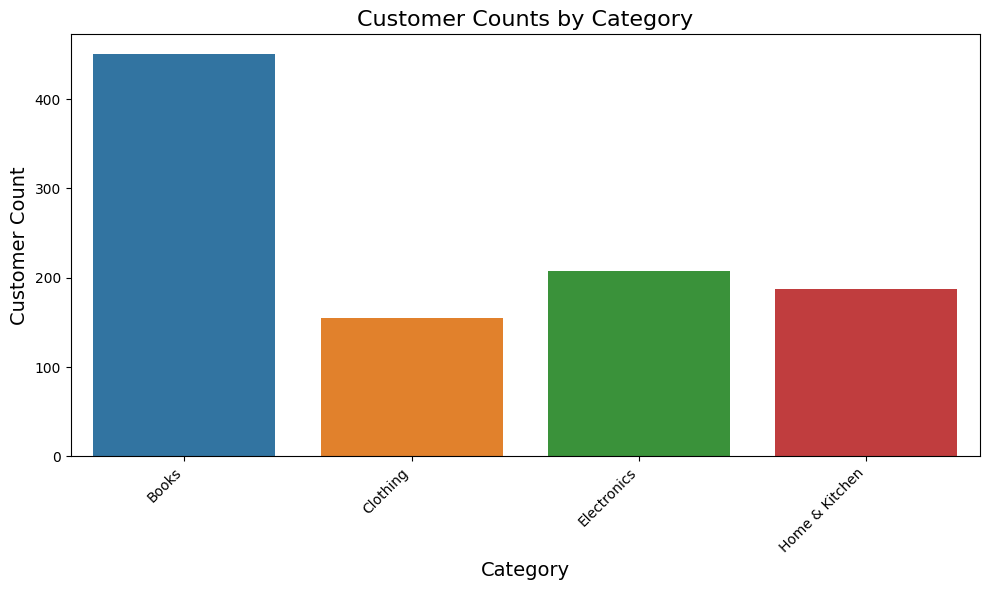

In [18]:
# Grouping by Category and counting Customer IDs
category_counts = merged_df.groupby(['Category'])['Customer ID'].count().reset_index(name='Count')

# Creating the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Category', y='Count')

# Customizing the plot
plt.title('Customer Counts by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

The analysis reveals that the category that experiences the highest frequency of purchases is "books." This indicates that among all product categories, books are the most popular choice among customers, suggesting a strong demand for literary items within the dataset. This insight could be valuable for strategic decision-making, such as inventory management, marketing campaigns targeting book enthusiasts, or expanding the selection of book-related products to capitalize on this high-demand category.